In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
# Load and preprocess data
df = pd.read_csv('/content/sample_data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [36]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
# Create features using 5-day window
lookback = 5
features = ['Open', 'High', 'Low', 'Close', 'Volume']
targets = ['Open', 'High', 'Close']

data = df[features].values
target = df[targets].values

In [ ]:
# Create sequences
X, y = [], []
for i in range(lookback, len(data)):
    X.append(data[i-lookback:i])
    y.append(target[i])
X, y = np.array(X), np.array(y)
print("X = ",X)
print("y = ",y)

X =  [[[5.00500490e+01 5.20820810e+01 4.80280270e+01 5.02202190e+01
   4.46590960e+07]
  [5.05555570e+01 5.45945970e+01 5.03003010e+01 5.42092090e+01
   2.28343430e+07]
  [5.54304310e+01 5.67967990e+01 5.45795780e+01 5.47547530e+01
   1.82561260e+07]
  [5.56756740e+01 5.58558580e+01 5.18368380e+01 5.24874880e+01
   1.52473370e+07]
  [5.25325320e+01 5.40540540e+01 5.19919930e+01 5.30530550e+01
   9.18860200e+06]]

 [[5.05555570e+01 5.45945970e+01 5.03003010e+01 5.42092090e+01
   2.28343430e+07]
  [5.54304310e+01 5.67967990e+01 5.45795780e+01 5.47547530e+01
   1.82561260e+07]
  [5.56756740e+01 5.58558580e+01 5.18368380e+01 5.24874880e+01
   1.52473370e+07]
  [5.25325320e+01 5.40540540e+01 5.19919930e+01 5.30530550e+01
   9.18860200e+06]
  [5.25275270e+01 5.40290300e+01 5.23823810e+01 5.40090100e+01
   7.09489800e+06]]

 [[5.54304310e+01 5.67967990e+01 5.45795780e+01 5.47547530e+01
   1.82561260e+07]
  [5.56756740e+01 5.58558580e+01 5.18368380e+01 5.24874880e+01
   1.52473370e+07]
  [5.25

In [ ]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Scale data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [ ]:
# Build MLP model
model = Sequential()
model.add(Flatten(input_shape=(lookback, len(features))))  # Added Flatten layer
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(targets)))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Train model
#early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9780e-04 - val_loss: 4.3853e-04
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1970e-04 - val_loss: 0.0014
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1821e-04 - val_loss: 3.5113e-04
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3020e-04 - val_loss: 4.9268e-04
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4395e-04 - val_loss: 1.4938e-04
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7482e-04 - val_loss: 0.0020
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3051e-04 - val_loss: 8.1479e-04
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4549e-04 - val_loss: 4.5618e-04
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5170e-04 - val_loss: 0.0024
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4088e-04 - val_loss: 1.6623e-04
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1480e-04 - val_loss

In [26]:
# Evaluate model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

In [27]:
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [28]:
# Calculate metrics
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

In [30]:
print(f"Training Loss: {train_loss}")
print(f"Test Loss: {test_loss}")
print(f"MAE: ${mae}")
print(f"RMSE: ${rmse}")

Training Loss: 0.00012706448615062982
Test Loss: 0.0029545905999839306
MAE: $56.20493433158151
RMSE: $67.31601083848258


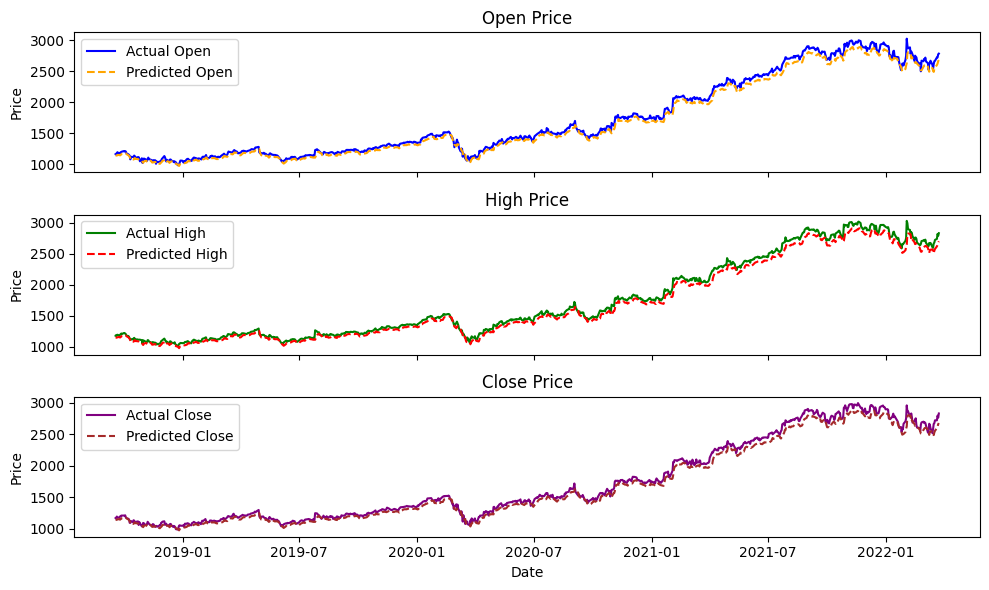

In [37]:
# Create subplots for Open, High, and Close prices
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Plot Open prices
axes[0].plot(df.index[-len(y_test):], y_test_actual[:, 0], label='Actual Open', color='blue')
axes[0].plot(df.index[-len(y_test):], y_pred[:, 0], linestyle='--', label='Predicted Open', color='orange')
axes[0].set_title('Open Price')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot High prices
axes[1].plot(df.index[-len(y_test):], y_test_actual[:, 1], label='Actual High', color='green')
axes[1].plot(df.index[-len(y_test):], y_pred[:, 1], linestyle='--', label='Predicted High', color='red')
axes[1].set_title('High Price')
axes[1].set_ylabel('Price')
axes[1].legend()

# Plot Close prices
axes[2].plot(df.index[-len(y_test):], y_test_actual[:, 2], label='Actual Close', color='purple')
axes[2].plot(df.index[-len(y_test):], y_pred[:, 2], linestyle='--', label='Predicted Close', color='brown')
axes[2].set_title('Close Price')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [39]:
# Function to predict stock prices for a given date
def predict_price(input_date):
    """
    Predict stock prices for a given date using the trained MLP model.
    :param input_date: Date in 'YYYY-MM-DD' format
    :return: Predicted Open, High, and Close prices
    """
    # Ensure the input date is valid
    try:
        input_date = pd.to_datetime(input_date)
    except ValueError:
        return "Invalid date format. Please use 'YYYY-MM-DD'."

    # Check if the date exists in the dataset
    if input_date not in df.index:
        return "Date not found in the dataset. Predictions are based on recent historical data."

    # Get the last 5 days of data before the input date
    last_5_days = df.loc[:input_date].iloc[-5:][features].values

    # Scale the data using the same scaler used during training
    scaled_data = scaler_X.transform(last_5_days)

    # Reshape data for prediction
    prediction = model.predict(scaled_data.reshape(1, lookback, len(features)))

    # Inverse transform the prediction to get actual values
    predicted_prices = scaler_y.inverse_transform(prediction)[0]

    return {
        "Predicted Open": predicted_prices[0],
        "Predicted High": predicted_prices[1],
        "Predicted Close": predicted_prices[2],
    }



In [40]:
# Example usage
user_date = input("Enter a date (YYYY-MM-DD): ")
predicted_prices = predict_price(user_date)

if isinstance(predicted_prices, dict):
    print(f"Predicted prices for {user_date}:")
    print(f"Open: {predicted_prices['Predicted Open']:.2f}")
    print(f"High: {predicted_prices['Predicted High']:.2f}")
    print(f"Close: {predicted_prices['Predicted Close']:.2f}")
else:
    print(predicted_prices)


Enter a date (YYYY-MM-DD): 2020-05-12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted prices for 2020-05-12:
Open: 1354.64
High: 1365.72
Close: 1353.76


In [41]:
# Example usage
user_date = input("Enter a date (YYYY-MM-DD): ")
predicted_prices = predict_price(user_date)

if isinstance(predicted_prices, dict):
    print(f"Predicted prices for {user_date}:")
    print(f"Open: {predicted_prices['Predicted Open']:.2f}")
    print(f"High: {predicted_prices['Predicted High']:.2f}")
    print(f"Close: {predicted_prices['Predicted Close']:.2f}")
else:
    print(predicted_prices)


Enter a date (YYYY-MM-DD): 2025-01-01
Date not found in the dataset. Predictions are based on recent historical data.
